<a href="https://colab.research.google.com/github/zeynepcicen/Pusula_Zeynep_Cicen/blob/main/DPP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Talent_Academy_Case_DT_2025.xlsx to Talent_Academy_Case_DT_2025.xlsx


In [ ]:
import pandas as pd

#Excel doyasını oku
df = pd.read_excel("Talent_Academy_Case_DT_2025.xlsx")

# Data Clean and Preprocess

In [ ]:
#Tekrar eden sutunların sayısını ogren

df.duplicated().sum()


np.int64(928)

In [ ]:
#Tekrar eden verileri sil

df = df.drop_duplicates()

In [ ]:
#Tekrar eden verileri sil

df = df.drop_duplicates()

#Temizlendiğini kontrol et
df.duplicated().sum()

np.int64(0)

# Missing Values

In [ ]:
#Hangi degıskende kac tane eksik var
df.isnull().sum()

,0
HastaNo,0
Yas,0
Cinsiyet,104
KanGrubu,365
Uyruk,0
KronikHastalik,345
Bolum,7
Alerji,540
Tanilar,46
TedaviAdi,0


In [ ]:
kat_df = df.select_dtypes(include=['object', 'category'])
kat_df.Bolum.unique()

array(['Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi',
       'İç Hastalıkları', 'Ortopedi Ve Travmatoloji', 'Kardiyoloji', nan,
       'Kalp Ve Damar Cerrahisi', 'Genel Cerrahi', 'Tıbbi Onkoloji',
       'Göğüs Hastalıkları', 'Nöroloji', 'Laboratuar'], dtype=object)

In [ ]:
df.head()

,HastaNo,Yas,Cinsiyet,KanGrubu,Uyruk,KronikHastalik,Bolum,Alerji,Tanilar,TedaviAdi,TedaviSuresi,UygulamaYerleri,UygulamaSuresi
0,145134,60,Kadın,0 Rh+,Türkiye,"Becker Musküler Distrofisi, Hiportiroidizm, Ka...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",TOZ,Ayak bileği ve ayağın yüzeysel yaralanması,Ayak Bileği,5 Seans,Ayak Bileği,20 Dakika
1,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,20 Dakika
2,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",20 Dakika
3,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,5 Dakika
6,145136,60,Erkek,0 Rh+,Türkiye,NaN,"Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi","POLEN,NOVALGIN",Parapleji ve tetrapleji,Parapleji,10 Seans,NaN,30 Dakika


In [ ]:
df.columns

Index(['HastaNo', 'Yas', 'Cinsiyet', 'KanGrubu', 'Uyruk', 'KronikHastalik',
       'Bolum', 'Alerji', 'Tanilar', 'TedaviAdi', 'TedaviSuresi',
       'UygulamaYerleri', 'UygulamaSuresi'],
      dtype='object')

In [ ]:
import pandas as pd

# Excel dosyasını oku
df = pd.read_excel("Talent_Academy_Case_DT_2025.xlsx")

# Çoklu bilgi olan sütunlar
multi_cols = ["KronikHastalik", "Alerji", "Tanilar", "TedaviAdi", "UygulamaYerleri"]

for col in multi_cols:
    # Ayırıcıları standart hale getir (virgül, +, ;)
    df[col] = df[col].astype(str).str.replace(r"[+;]", ",", regex=True)

    # Listeye çevir ve explode et
    df_exploded = df.assign(**{col: df[col].str.split(",")}).explode(col)

    # Boşlukları temizle
    df_exploded[col] = df_exploded[col].str.strip()

    # One-hot encoding
    dummies = pd.get_dummies(df_exploded[col], prefix=col)

    # Orijinal ile birleştir
    df_exploded = pd.concat([df_exploded.drop(columns=[col]), dummies], axis=1)

    # ---- GRUPLAMA STRATEJİSİ ----
    agg_dict = {}
    for c in df_exploded.columns:
        if c == "HastaNo":
            continue
        elif df_exploded[c].dtype in ["int64", "float64"]:  # sayısal kolonlar
            agg_dict[c] = "max"
        else:  # metin kolonları
            agg_dict[c] = "first"

    # HastaNo’ya göre grupla
    df = df_exploded.groupby("HastaNo", as_index=False).agg(agg_dict)

  # Sayıya çevirme
num_cols = ["TedaviSuresi", "UygulamaSuresi"]

for col in num_cols:
    df[col] = (
        df[col]
        .astype(str)                       # stringe çevir
        .str.extract(r'(\d+)')             # sadece sayıyı al
        .astype(float)                     # sayıya çevir
        .astype("Int64")                   # tam sayı yap (NaN destekler)
    )


# Yeni dosyayı kaydet
df.to_excel("yeni.xlsx", index=False)
print("Yeni dosya 'yeni.xlsx' kaydedildi")


Yeni dosya 'yeni.xlsx' kaydedildi


# Data Visualization

/tmp/ipython-input-692372387.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=kronik_counts.index, y=kronik_counts.values, palette="viridis")


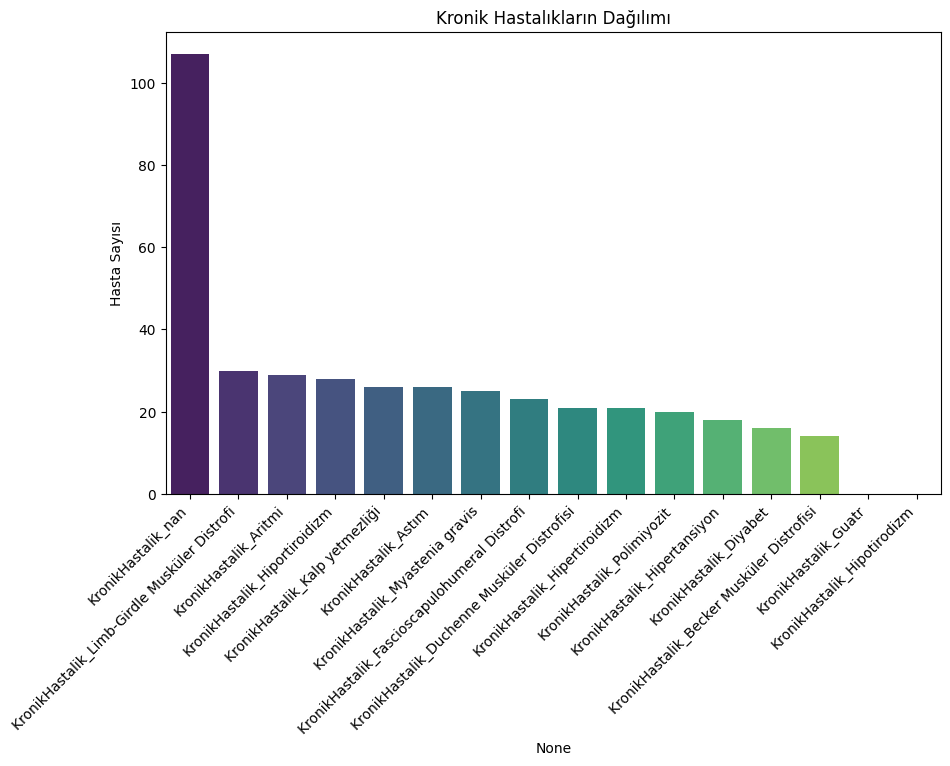

In [ ]:
#Kronik Hastalıkların Dağılımı

import matplotlib.pyplot as plt
import seaborn as sns

# Kronik hastalık sütunlarını seç
kronik_cols = [c for c in df.columns if c.startswith("KronikHastalik_")]

# Hasta sayısını hesapla
kronik_counts = df[kronik_cols].sum().sort_values(ascending=False)

# Bar chart
plt.figure(figsize=(10,6))
sns.barplot(x=kronik_counts.index, y=kronik_counts.values, palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Hasta Sayısı")
plt.title("Kronik Hastalıkların Dağılımı")
plt.show()

/tmp/ipython-input-395270702.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tedavi_counts.index, y=tedavi_counts.values, palette="magma")


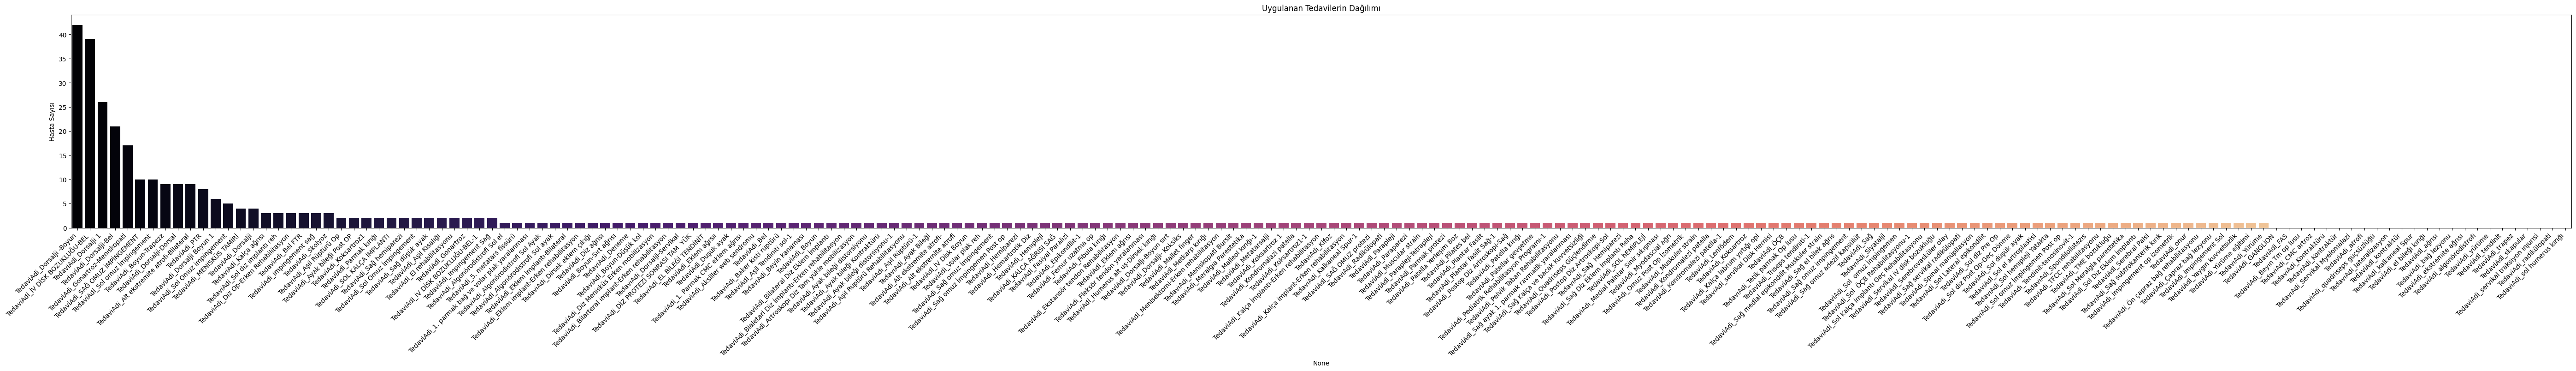

In [ ]:
#Uygulanan Tedavilerin Dağılımı

tedavi_cols = [c for c in df.columns if c.startswith("TedaviAdi_")]

tedavi_counts = df[tedavi_cols].sum().sort_values(ascending=False)

plt.figure(figsize=(70,6))
sns.barplot(x=tedavi_counts.index, y=tedavi_counts.values, palette="magma")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Hasta Sayısı")
plt.title("Uygulanan Tedavilerin Dağılımı")
plt.show()


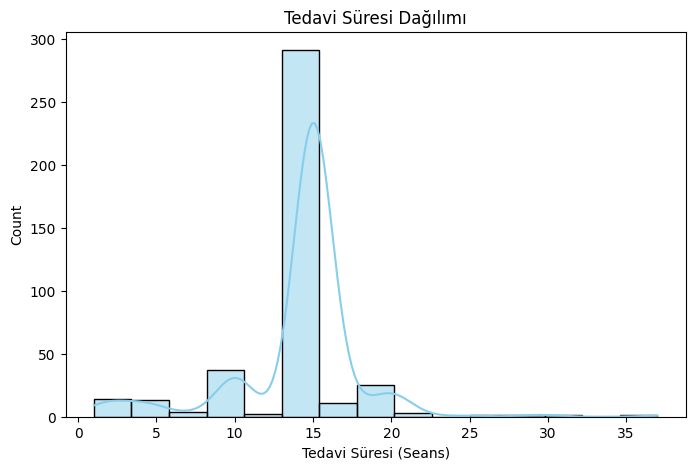

In [ ]:
#Tedavi Süresi Dağılımı
plt.figure(figsize=(8,5))
sns.histplot(df["TedaviSuresi"], bins=15, kde=True, color="skyblue")
plt.xlabel("Tedavi Süresi (Seans)")
plt.title("Tedavi Süresi Dağılımı")
plt.show()


/tmp/ipython-input-1107929854.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='KanGrubu', data=df, order=df['KanGrubu'].value_counts().index, palette="Set2")


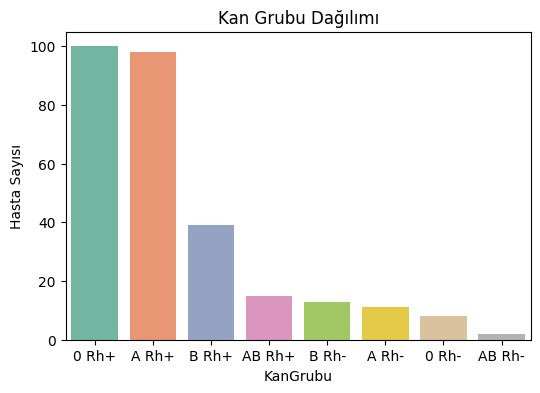

In [ ]:
#Kan Grubu Dağılımı

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='KanGrubu', data=df, order=df['KanGrubu'].value_counts().index, palette="Set2")
plt.title("Kan Grubu Dağılımı")
plt.ylabel("Hasta Sayısı")
plt.show()


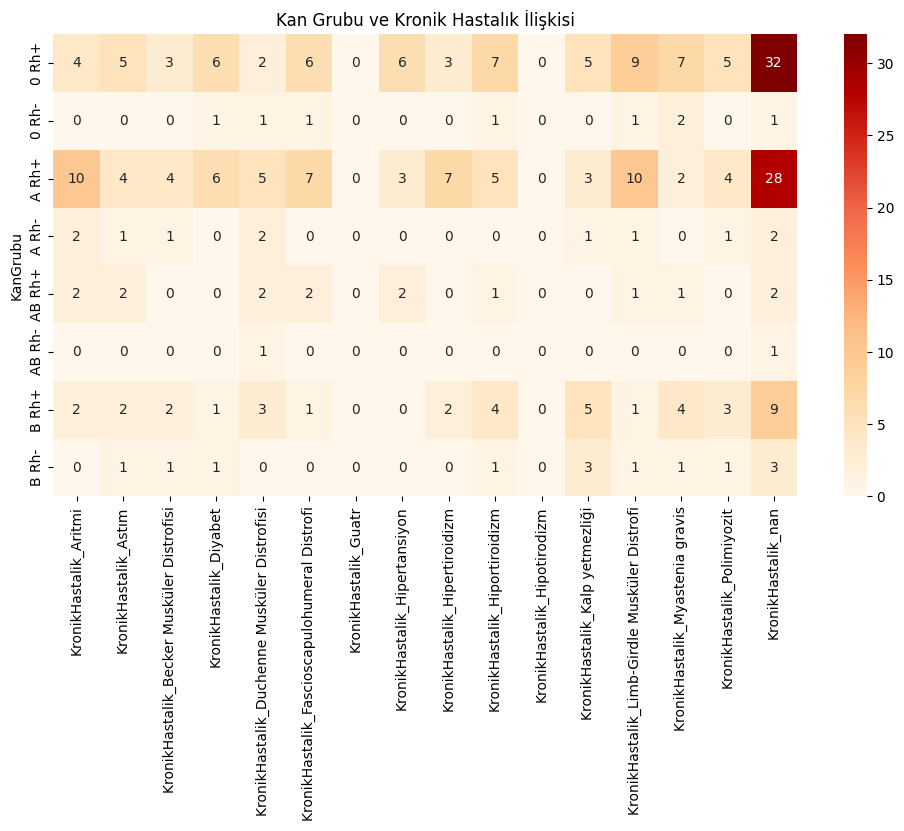

In [ ]:
#Kan Grubu ve Kronik Hastalık İlişkisi

import numpy as np

# Pivot tablo: KanGrubu x KronikHastalik
pivot = pd.DataFrame()
for col in kronik_cols:
    pivot[col] = df.groupby('KanGrubu')[col].sum()

plt.figure(figsize=(12,6))
sns.heatmap(pivot, annot=True, fmt="d", cmap="OrRd")
plt.title("Kan Grubu ve Kronik Hastalık İlişkisi")
plt.show()


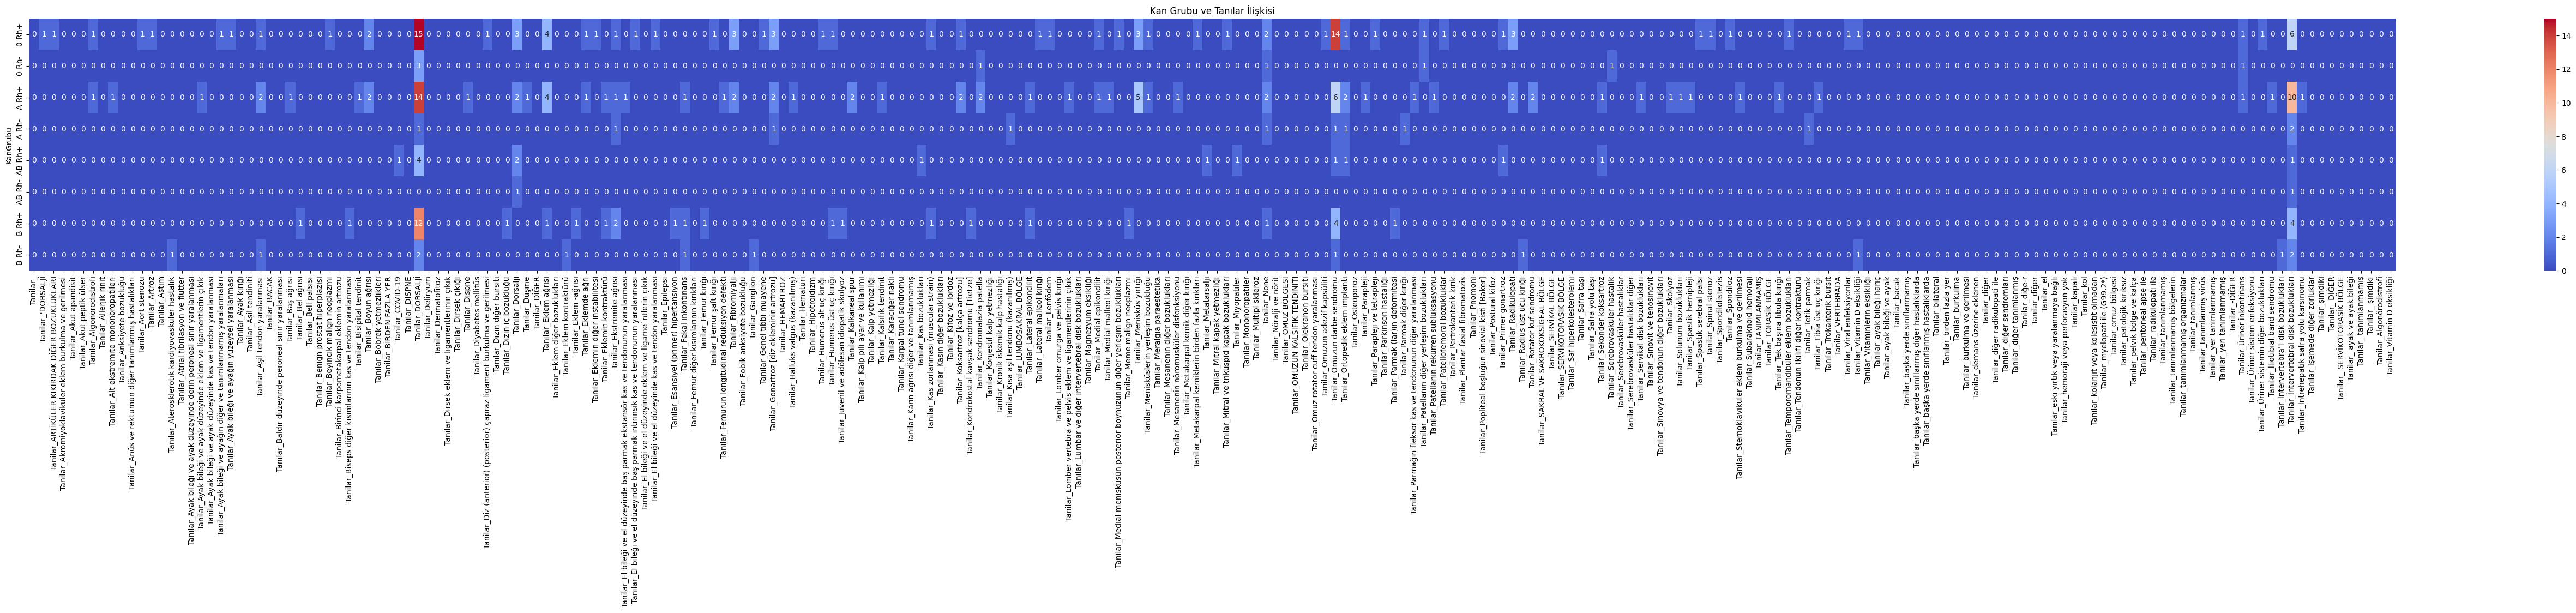

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tanılar sütunlarını seç
tanilar_cols = [c for c in df.columns if c.startswith("Tanilar_")]

# Gruplamayı tek seferde yap
pivot_tani = df.groupby('KanGrubu')[tanilar_cols].sum()

# Heatmap çiz
plt.figure(figsize=(70,6))
sns.heatmap(pivot_tani, annot=True, fmt="d", cmap="coolwarm")
plt.title("Kan Grubu ve Tanılar İlişkisi")
plt.show()


/tmp/ipython-input-3283030370.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pivot_avg.index, y=pivot_avg.values, palette="BrBG")


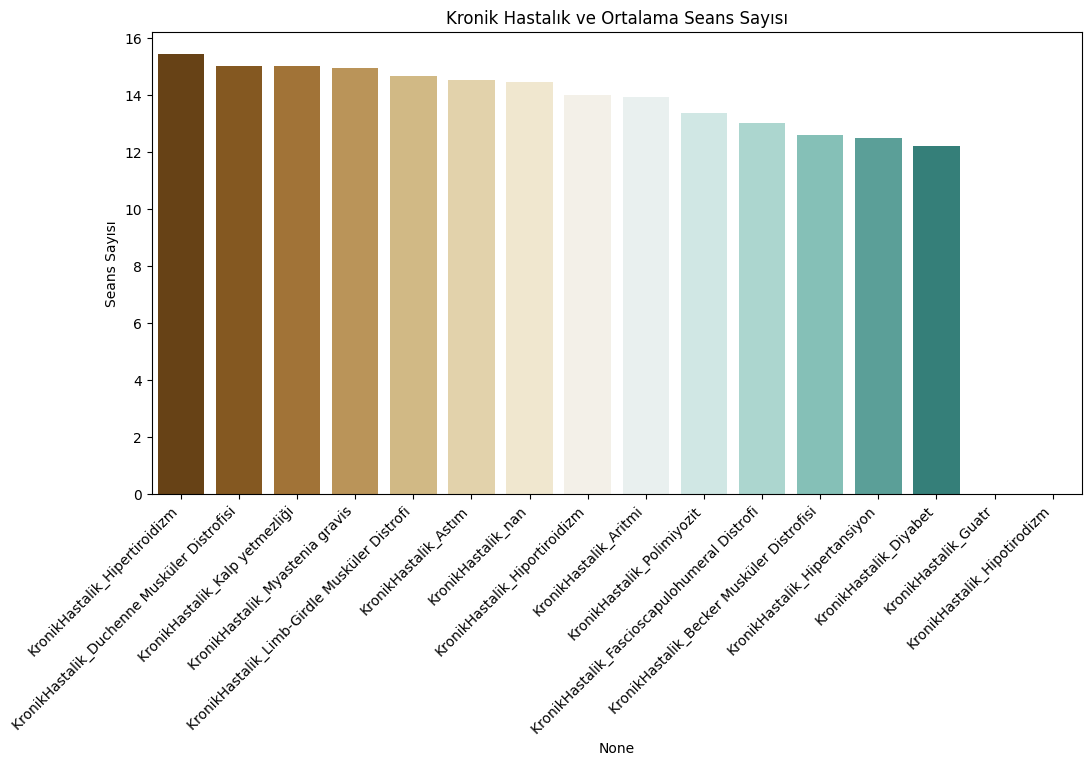

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Kronik hastalık sütunlarını seç (one-hot encoding)
kronik_cols = [c for c in df.columns if c.startswith("KronikHastalik_")]

# Her hastalık için tedavi süresinin ortalaması
pivot_avg = {}
for col in kronik_cols:
    # Hastalığı olan hastaların tedavi süresinin ortalaması
    pivot_avg[col] = df.loc[df[col] == 1, 'TedaviSuresi'].mean()

pivot_avg = pd.Series(pivot_avg).sort_values(ascending=False)

# Bar chart
plt.figure(figsize=(12,6))
sns.barplot(x=pivot_avg.index, y=pivot_avg.values, palette="BrBG")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Seans Sayısı")
plt.title("Kronik Hastalık ve Ortalama Seans Sayısı")
plt.show()


/tmp/ipython-input-3329987290.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pivot_avg.index, y=pivot_avg.values, palette="viridis")


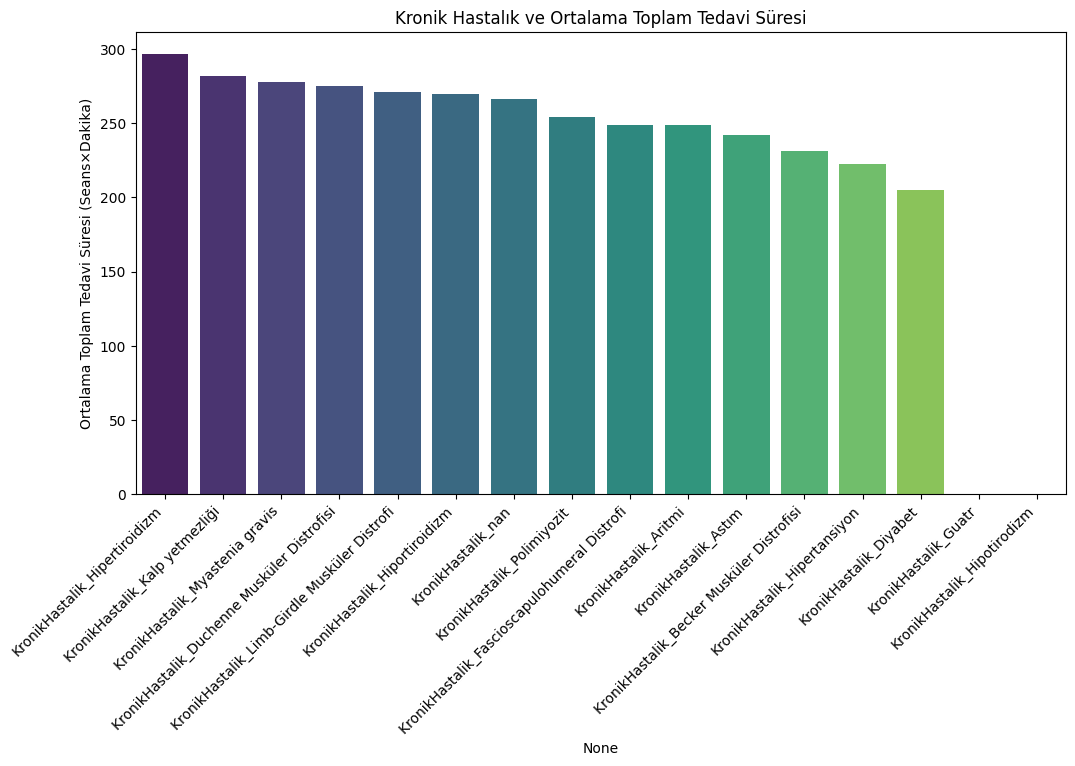

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Kronik hastalık sütunlarını seç
kronik_cols = [c for c in df.columns if c.startswith("KronikHastalik_")]

# Her hasta için toplam tedavi süresi (seans × süre)
df['ToplamTedaviSuresi'] = df['TedaviSuresi'] * df['UygulamaSuresi']

# Her hastalık için toplam ve ortalama süre
pivot_avg = {}
for col in kronik_cols:
    # O hastalığı olan hastaların toplam tedavi süresi
    toplam = (df[col] * df['ToplamTedaviSuresi']).sum()
    hasta_sayisi = df[col].sum()
    pivot_avg[col] = toplam / hasta_sayisi if hasta_sayisi > 0 else 0

pivot_avg = pd.Series(pivot_avg).sort_values(ascending=False)

# Bar chart
plt.figure(figsize=(12,6))
sns.barplot(x=pivot_avg.index, y=pivot_avg.values, palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Ortalama Toplam Tedavi Süresi (Seans×Dakika)")
plt.title("Kronik Hastalık ve Ortalama Toplam Tedavi Süresi")
plt.show()
